In [ ]:
#preprocessed data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define file path
file_path = '/content/ml_final.csv'
# Read the entire dataset into a DataFrame
df = pd.read_csv(file_path)

# Display NaN counts before filling
print("NaN counts before filling:")
print(df.isnull().sum())

# Handle missing values by filling with mean or mode
# Calculate the mean of numerical columns
numerical_cols = ['CustAccountBalance', 'TransactionAmount (INR)']
mean_values = df[numerical_cols].mean()

# Calculate the mode of categorical column 'CustGender'
mode_value = df['CustGender'].mode()[0]

# Fill missing values with mean or mode
df.fillna(mean_values, inplace=True)
df['CustGender'].fillna(mode_value, inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['CustGender', 'CustLocation'])

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Set display options to show only a few rows and columns
pd.set_option('display.max_rows', 10)  # Set maximum number of rows to display
pd.set_option('display.max_columns', 10)  # Set maximum number of columns to display


# Display preprocessed DataFrame
print("\nPreprocessed DataFrame:")
print(df)


NaN counts before filling:
TransactionID               0
CustomerID                  0
CustomerDOB                27
CustGender                  1
CustLocation                0
CustAccountBalance          1
TransactionDate             0
TransactionAmount (INR)     0
dtype: int64

Preprocessed DataFrame:
    TransactionID CustomerID CustomerDOB  CustAccountBalance TransactionDate  \
0              T1   C5841053  10-01-1994           -0.281405      02-08-2016   
1              T2   C2142763  04-04-1957           -0.345516      02-08-2016   
2              T3   C4417068  26-11-1996           -0.281177      02-08-2016   
3              T4   C5342380  14-09-1973            3.218006      02-08-2016   
4              T5   C9031234  24-03-1988           -0.327193      02-08-2016   
..            ...        ...         ...                 ...             ...   
995          T996   C8317970  20-04-1989           -0.346746      21-10-2016   
996          T997   C9099692  27-02-1990            2.8

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['TransactionID', 'CustomerID', 'CustomerDOB', 'TransactionDate'])
y = df['TransactionAmount (INR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 263)
X_test shape: (200, 263)
y_train shape: (800,)
y_test shape: (200,)


In [ ]:
#implementing various algorithms
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

# Define Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1)

# Fit Isolation Forest model
isolation_forest.fit(X_train)

# Predict anomalies on training data
isolation_forest_train_preds = isolation_forest.predict(X_train)

# Predict anomalies on testing data
isolation_forest_test_preds = isolation_forest.predict(X_test)

# Display results
print("Isolation Forest - Training Predictions:")
print(isolation_forest_train_preds)
print("\nIsolation Forest - Testing Predictions:")
print(isolation_forest_test_preds)

# Define Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit Local Outlier Factor model
lof.fit(X_train)

# Predict anomalies on training data
lof_train_preds = lof.fit_predict(X_train)

# Predict anomalies on testing data
lof_test_preds = lof.fit_predict(X_test)

# Display results
print("\nLocal Outlier Factor - Training Predictions:")
print(lof_train_preds)
print("\nLocal Outlier Factor - Testing Predictions:")
print(lof_test_preds)

# Define DBSCAN model(Density-Based Spatial Clustering of Applications with Noise)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN model
dbscan.fit(X_train)

# Predict anomalies on training data
dbscan_train_preds = dbscan.fit_predict(X_train)

# Predict anomalies on testing data
dbscan_test_preds = dbscan.fit_predict(X_test)

# Display results
print("\nDBSCAN - Training Predictions:")
print(dbscan_train_preds)
print("\nDBSCAN - Testing Predictions:")
print(dbscan_test_preds)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest - Training Predictions:
[ 1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1
  1 -1  1 

In [ ]:
#evaluating those algorithms based on mse mae and r2 score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics for Isolation Forest
iso_mae = mean_absolute_error(y_test, isolation_forest_test_preds)
iso_mse = mean_squared_error(y_test, isolation_forest_test_preds)
iso_r2 = r2_score(y_test, isolation_forest_test_preds)

# Calculate evaluation metrics for Local Outlier Factor
lof_mae = mean_absolute_error(y_test, lof_test_preds)
lof_mse = mean_squared_error(y_test, lof_test_preds)
lof_r2 = r2_score(y_test, lof_test_preds)

# Calculate evaluation metrics for DBSCAN
dbscan_mae = mean_absolute_error(y_test, dbscan_test_preds)
dbscan_mse = mean_squared_error(y_test, dbscan_test_preds)
dbscan_r2 = r2_score(y_test, dbscan_test_preds)

# Print evaluation results
print("Evaluation Results:")
print("Isolation Forest - MAE:", iso_mae)
print("Isolation Forest - MSE:", iso_mse)
print("Isolation Forest - R2 Score:", iso_r2)
print()
print("Local Outlier Factor - MAE:", lof_mae)
print("Local Outlier Factor - MSE:", lof_mse)
print("Local Outlier Factor - R2 Score:", lof_r2)
print()
print("DBSCAN - MAE:", dbscan_mae)
print("DBSCAN - MSE:", dbscan_mse)
print("DBSCAN - R2 Score:", dbscan_r2)


Evaluation Results:
Isolation Forest - MAE: 1.1539255638350667
Isolation Forest - MSE: 1.5216948841795648
Isolation Forest - R2 Score: -2.6556399546306584

Local Outlier Factor - MAE: 1.1779836594188164
Local Outlier Factor - MSE: 1.7756940982504927
Local Outlier Factor - R2 Score: -3.265834340546002

DBSCAN - MAE: 1.8756309784790652
DBSCAN - MSE: 6.616353741968583
DBSCAN - R2 Score: -14.894781105314063


In [ ]:
#selecting the best fit algorithm with min mse and mae and max r2 score
# Choose the algorithm with the best performance based on evaluation metrics
best_algorithm = None
best_mae = float('inf')
best_mse = float('inf')
best_r2 = float('-inf')

# Check which algorithm has the best performance
for algorithm, mae, mse, r2 in [("Isolation Forest", iso_mae, iso_mse, iso_r2),
                                ("Local Outlier Factor", lof_mae, lof_mse, lof_r2),
                                ("DBSCAN", dbscan_mae, dbscan_mse, dbscan_r2)]:
    if mae < best_mae and mse < best_mse and r2 > best_r2:
        best_algorithm = algorithm
        best_mae = mae
        best_mse = mse
        best_r2 = r2

# Print the best-suited algorithm and its evaluation metrics
print("\nBest-Suited Algorithm:", best_algorithm)
print("Evaluation Metrics - MAE:", best_mae)
print("Evaluation Metrics - MSE:", best_mse)
print("Evaluation Metrics - R2 Score:", best_r2)



Best-Suited Algorithm: Isolation Forest
Evaluation Metrics - MAE: 1.1539255638350667
Evaluation Metrics - MSE: 1.5216948841795648
Evaluation Metrics - R2 Score: -2.6556399546306584


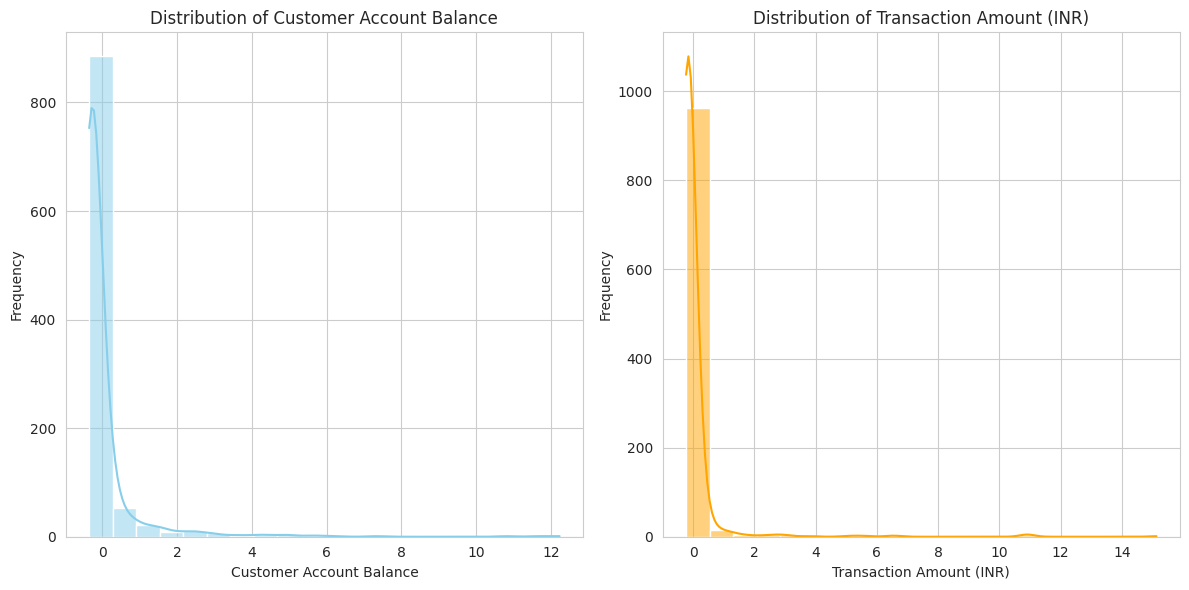

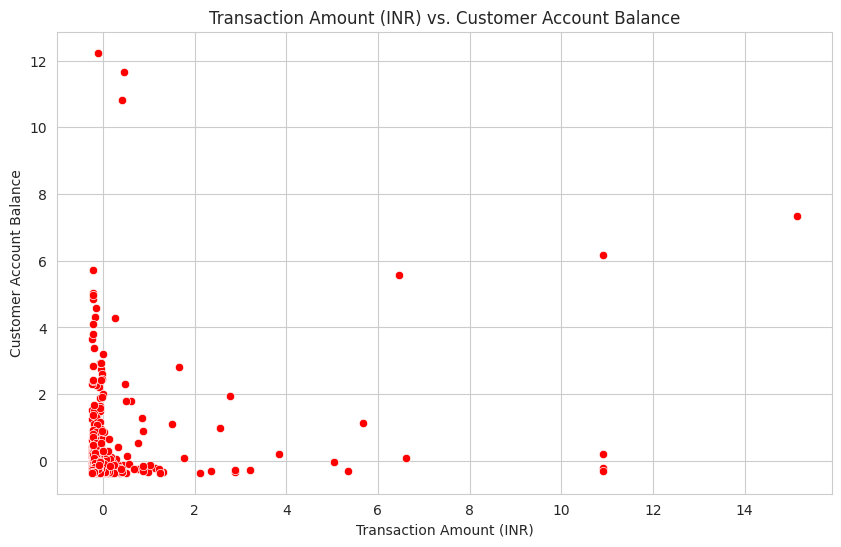

In [ ]:
#plotting normal graph of the data
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn plots
sns.set_style("whitegrid")

# Histograms for CustAccountBalance and TransactionAmount (INR)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['CustAccountBalance'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Customer Account Balance')
plt.xlabel('Customer Account Balance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['TransactionAmount (INR)'], bins=20, color='orange', kde=True)
plt.title('Distribution of Transaction Amount (INR)')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot for TransactionAmount (INR) vs. CustAccountBalance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount (INR)', y='CustAccountBalance', color='red')
plt.title('Transaction Amount (INR) vs. Customer Account Balance')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Customer Account Balance')
plt.show()


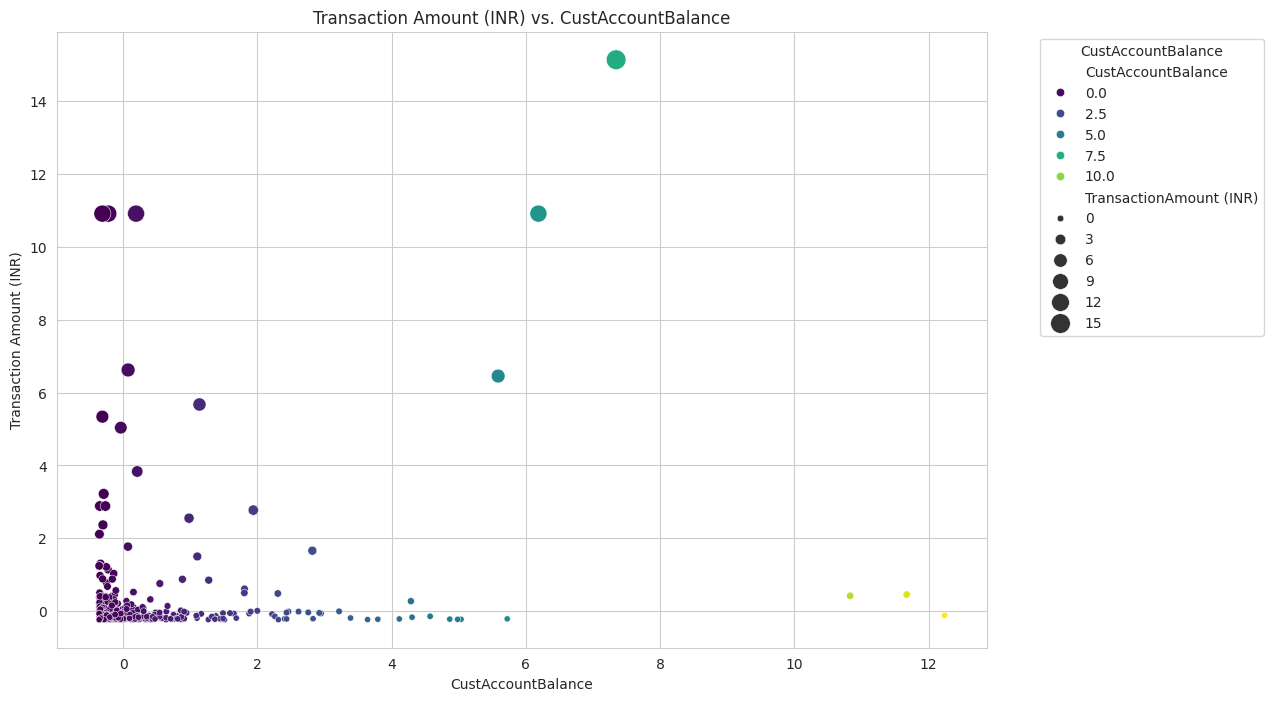

'Sizes of Circles: In anomaly detection, larger or smaller circle sizes may indicate different characteristics of the data points. For example, larger circles may represent data points with higher transaction amounts or account balances, while smaller circles may represent lower values. Look for patterns or anomalies in the distribution of circle sizes. Anomalies might appear as data points with unusually large or small circle sizes compared to the majority of the data.\nColors (Hues): The colors of the circles can provide additional information about the data points. In anomaly detection, different colors may represent different categories or levels of a variable. For instance, darker or lighter hues may indicate higher or lower account balances, respectively. Anomalies may manifest as data points with distinct or unexpected colors compared to the majority of the data.By examining both the sizes and hues of the circles in the scatter plot, you can identify potential anomalies or unusu

In [ ]:
#this scatter plot provides a visual representation of the data distribution and can help in exploring, analyzing, and interpreting the dataset.
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn plots
sns.set_style("whitegrid")

# Create scatter plot with continuous hues and sizes
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='CustAccountBalance', y='TransactionAmount (INR)', hue='CustAccountBalance', size='TransactionAmount (INR)', sizes=(20, 200), palette='viridis')
plt.title('Transaction Amount (INR) vs. CustAccountBalance')
plt.xlabel('CustAccountBalance')
plt.ylabel('Transaction Amount (INR)')
plt.legend(title='CustAccountBalance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

'''Sizes of Circles: In anomaly detection, larger or smaller circle sizes may indicate different characteristics of the data points. For example, larger circles may represent data points with higher transaction amounts or account balances, while smaller circles may represent lower values. Look for patterns or anomalies in the distribution of circle sizes. Anomalies might appear as data points with unusually large or small circle sizes compared to the majority of the data.
Colors (Hues): The colors of the circles can provide additional information about the data points. In anomaly detection, different colors may represent different categories or levels of a variable. For instance, darker or lighter hues may indicate higher or lower account balances, respectively. Anomalies may manifest as data points with distinct or unexpected colors compared to the majority of the data.By examining both the sizes and hues of the circles in the scatter plot, you can identify potential anomalies or unusual patterns in the data. Keep in mind that anomalies may not always be visually apparent and may require further analysis using statistical methods or machine learning algorithms.'''


In [ ]:
#create an Anomaly column in your DataFrame and populate it with the anomaly predictions made by the isolation forest model
from sklearn.ensemble import IsolationForest

# Define the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1)

# Fit the model to your data
isolation_forest.fit(df[['CustAccountBalance', 'TransactionAmount (INR)']])

# Predict anomalies
anomaly_preds = isolation_forest.predict(df[['CustAccountBalance', 'TransactionAmount (INR)']])

# Add anomaly predictions to the dataframe
df['Anomaly'] = anomaly_preds

# Identify accounts with anomalies
anomalous_accounts = df[df['Anomaly'] == -1]

# Display the anomalous accounts
print("Accounts with anomalies:")
print(anomalous_accounts)


Accounts with anomalies:
    TransactionID CustomerID CustomerDOB  CustAccountBalance TransactionDate  \
1              T2   C2142763  04-04-1957           -0.345516      02-08-2016   
3              T4   C5342380  14-09-1973            3.218006      02-08-2016   
12            T13   C6339347  13-06-1978           -0.221799      02-08-2016   
28            T29   C7935438  01-01-1800            3.642433      03-08-2016   
33            T34   C2043652  25-07-1979            0.155515      03-08-2016   
..            ...        ...         ...                 ...             ...   
932          T933   C6576480  02-10-1978           -0.298733      21-10-2016   
938          T939   C5874370  25-12-1979            0.075553      21-10-2016   
975          T976   C6256982  25-12-1983            0.406939      21-10-2016   
983          T984   C4122560  19-02-1980            4.983582      21-10-2016   
996          T997   C9099692  27-02-1990            2.830412      21-10-2016   

     ...  Cust

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


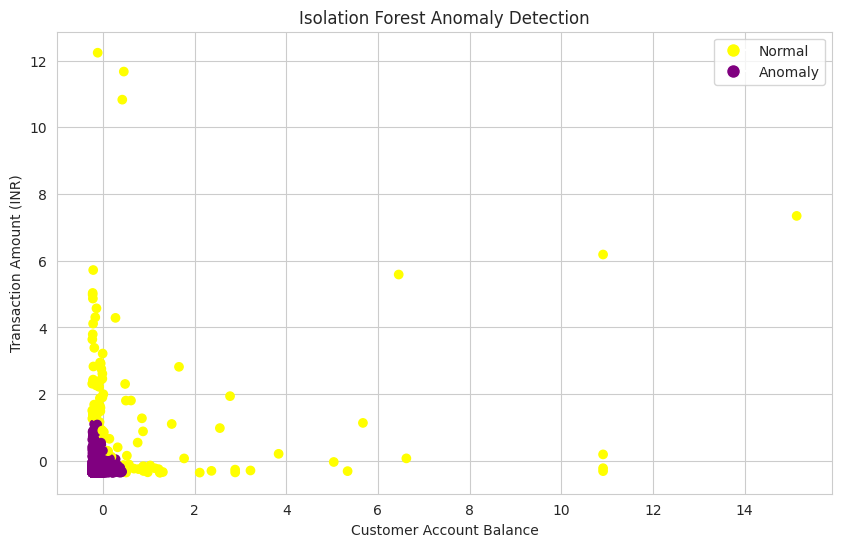

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define custom colormap
colors = ['yellow', 'purple']
cmap = ListedColormap(colors)

# Visualize the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['TransactionAmount (INR)'], df['CustAccountBalance'], c=df['Anomaly'], cmap=cmap)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Amount (INR)')

# Create legend
normal_patch = plt.Line2D([0], [0], marker='o', color='w', markersize=10, label='Normal', markerfacecolor='yellow')
anomaly_patch = plt.Line2D([0], [0], marker='o', color='w', markersize=10, label='Anomaly', markerfacecolor='purple')
plt.legend(handles=[normal_patch, anomaly_patch])

plt.show()


In [ ]:
!git clone https://github.com/Janhavi1225-tq/ML_Anomaly_detection.git
%cd ML_Anomaly_detection


Cloning into 'ML_Anomaly_detection'...
/content/ML_Anomaly_detection/ML_Anomaly_detection


In [ ]:
!echo "# My ML Project" > README.md


In [ ]:
!git config --global user.email "janhavi.v.patil@cumminscollege.in"
!git config --global user.name "Janhavi Patil"


In [ ]:
!git add README.md
!git commit -m "Initial commit"
!git branch -M main
!git push -u origin main


[main (root-commit) 501c212] Initial commit
 1 file changed, 1 insertion(+)
 create mode 100644 README.md
fatal: could not read Username for 'https://github.com': No such device or address
